In [1]:
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import os.path

from data_sim_module import get_curve_samples, get_questionnaires, \
 compute_mds, get_true_mds, align_pca_mds, \
    corr_between_coords


plt.rcParams.update({"font.size" : 15, 
                     "figure.dpi" : 100, 
                     "legend.fontsize" : 13, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True, 
                     "figure.figsize":(6, 5)})

KeyboardInterrupt: 

In [20]:
# output file
filename = "heatmap.pdf"

# number of questions
number_q = 8  

# number of answers
number_a = 3

# range of sub-manifold parameters to test
m_vals = np.linspace(1, 10, 10, dtype=int)

# range of kappa values to test
k_vals = [1, 2, 5, 10, 50, 100, 500, 1000, 3280, 6560]
#k_vals = np.linspace(1, number_a**number_q - 1, 3, dtype=int)

# dimensions of FINE output
dim = 2  

# number of responses
num_responses = 25

# number of groups
K = 20

correlation = np.zeros((len(m_vals), len(k_vals)))

for m_idx, m in enumerate(m_vals):
    
    for k_idx, k in enumerate(k_vals):
        
        probs_filename = "probs-K{:03d}-kappa{:04d}-m{:03d}-responses{:03d}.npy".format(K, k, m, num_responses)
        if os.path.isfile(probs_filename):
            probs = np.load(probs_filename)
        else:
            probs = get_curve_samples(number_q=number_q, number_a=number_a, samples=K, m=m, sin_angle=k-1)
            np.save(probs_filename, probs)

        df = get_questionnaires(probs, count_answers=num_responses, number_q=number_q, number_a=number_a)

        # get theoretical embedding
        true_mds = get_true_mds(probs)

        # FINE
        _, mds_joint = compute_mds(df, dim=dim, compute_joint=True)

        # align the coordinates
        mds_joint = align_pca_mds(true_mds, mds_joint)

        # compute correlation between FI and theoretical embeddings
        fi_corr = corr_between_coords(true_mds, mds_joint)

        # store value
        correlation[m_idx][k_idx] = fi_corr

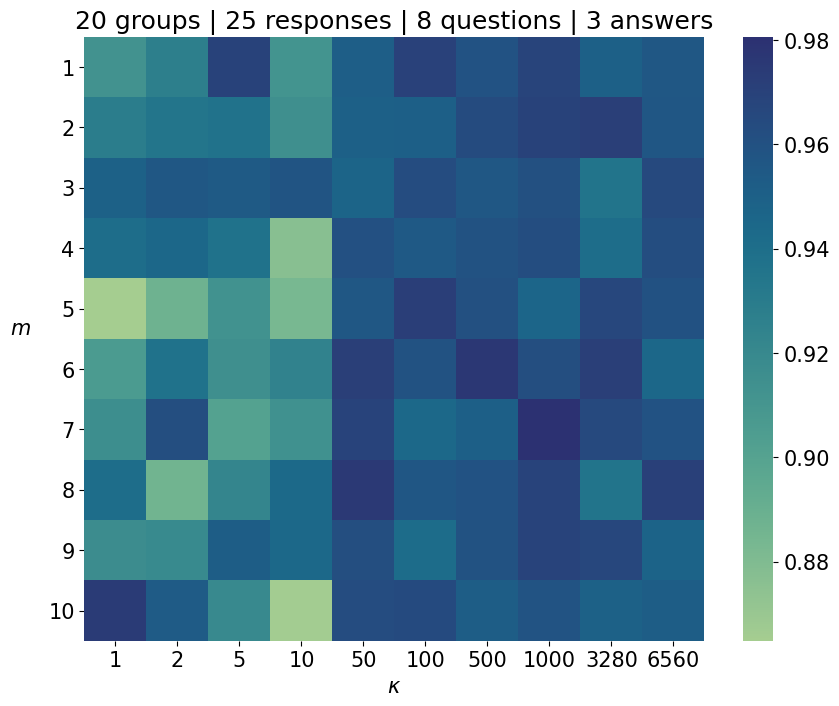

In [24]:
plt.figure(figsize=(10,8))

ax = sns.heatmap(correlation, xticklabels=k_vals, yticklabels=m_vals, cmap="crest")
plt.xlabel(r"$\kappa$")
plt.ylabel(r"$m$", rotation=0, labelpad=20)
plt.yticks(rotation=0) 
plt.title(f"{K} groups | {num_responses} responses | {number_q} questions | {number_a} answers")

plt.savefig("20G_25R_8Q_3A.pdf")
plt.show()